***DATA SCIENCE PROJECT :Seattle Weather Dataset Analysis***

***Project overview*** 
In this project, you will work with the Seattle Weather dataset, which includes daily weather observations such as temperature, precipitation, and other weather-related metrics for Seattle. The goal is to preprocess the data, perform exploratory data analysis (EDA), and build and evaluate various regression models to predict a target variable. This project is divided into three main parts: Data Preprocessing, Exploratory Data Analysis (EDA), and Regression Modeling.

***Part 1: Data Preprocessing
1.	Missing Values:***


Identify and list all columns in the dataset that have missing values.

In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import pearsonr
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [2]:
data = pd.read_csv('seattle-weather.csv')
data

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


Calculate the percentage of missing values for each column in the dataset.

In [3]:
a = data.shape[0]
a

1461

In [4]:
data.isna().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

no missing values 

For the Max Temperature column, how would you handle the missing values? Describe your approach.

In [5]:
Temp =data['temp_max'].isnull().sum()
Temp

np.int64(0)

there is no missing value

For the Precipitation column, how would you impute missing values? What method would you choose and why?

In [6]:
Precip=data['precipitation'].isnull().sum()
Precip

np.int64(0)

there is no missing value

How would you handle missing values in the Wind Speed column for the dataset?

In [7]:
Wind =data['wind'].isnull().sum()
Wind

np.int64(0)

No mising value

***Outlier Handling:***

Identify outliers in the max and min Temperature column using a suitable method (e.g., Z-score or IQR). Describe your findings.

In [8]:
Q1=data['temp_max'].quantile(0.25)
Q3=data['temp_max'].quantile(0.75)
IQR =Q3-Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
cleandf2 = data[(data['temp_max']>lower) & (data['temp_max']<upper)]
cleandf2

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [9]:
b = cleandf2.shape[0]
b

1461

In [10]:
outliers = a - b
outliers

0

no outliers exist

In [11]:
Q1=cleandf2['temp_min'].quantile(0.25)
Q3=cleandf2['temp_min'].quantile(0.75)
IQR =Q3-Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
cleandf3 = cleandf2[(data['temp_min']>lower) & (cleandf2['temp_min']<upper)]
cleandf3

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [12]:
d = cleandf3.shape[0]
d

1461

In [13]:
outliers_min = a - d
outliers_min

0

no outliers exist

How would you handle outliers in the Precipitation column? Explain your approach.

In [14]:
Q1=cleandf3['precipitation'].quantile(0.25)
Q3=cleandf3['precipitation'].quantile(0.75)
IQR =Q3-Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
cleandf4 = cleandf3[(cleandf3['precipitation']>lower) & (cleandf3['precipitation']<upper)]
cleandf4

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
2,2012-01-03,0.8,11.7,7.2,2.3,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
5,2012-01-06,2.5,4.4,2.2,2.2,rain
6,2012-01-07,0.0,7.2,2.8,2.3,rain
...,...,...,...,...,...,...
1455,2015-12-26,0.0,4.4,0.0,2.5,sun
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [15]:
c = cleandf4.shape[0]
c

1255

In [16]:
outliers_precip = a - c
outliers_precip

206

in precipitation 206 outliers exists

Discuss the impact of outliers on the Wind Speed feature. Should you remove or transform these outliers?

In [17]:
Q1=cleandf4['wind'].quantile(0.25)
Q3=cleandf4['wind'].quantile(0.75)
IQR =Q3-Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
cleandf5 = cleandf4[(cleandf4['wind']>lower) & (cleandf4['wind']<upper)]
cleandf5

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
2,2012-01-03,0.8,11.7,7.2,2.3,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
5,2012-01-06,2.5,4.4,2.2,2.2,rain
6,2012-01-07,0.0,7.2,2.8,2.3,rain
...,...,...,...,...,...,...
1455,2015-12-26,0.0,4.4,0.0,2.5,sun
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [18]:
e = cleandf5.shape[0]
e

1211

In [19]:
outliers_wind = c -e
outliers_wind

44

in wind columns  there are 44 outliers

In [20]:
df = cleandf5

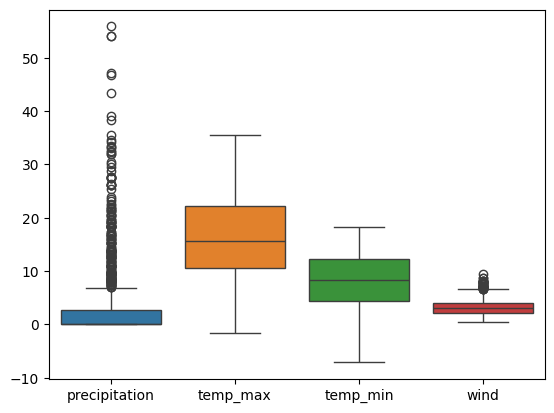

In [21]:
sns.boxplot(data= data)
plt.show()

How does scaling affect outlier detection in the Temperature column? Apply scaling and observe the changes.

In [22]:
data

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [23]:
ss = StandardScaler()
s_tempmax = ss.fit_transform(data['temp_max'].values.reshape(-1,1))
data['s_tempmax'] = s_tempmax

s_tempmin = ss.fit_transform(data['temp_min'].values.reshape(-1,1))
data['s_tempmin'] = s_tempmin
data

,date,precipitation,temp_max,temp_min,wind,weather,s_tempmax,s_tempmin
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle,-0.495299,-0.644212
1,2012-01-02,10.9,10.6,2.8,4.5,rain,-0.794731,-1.082347
2,2012-01-03,0.8,11.7,7.2,2.3,rain,-0.645015,-0.206077
3,2012-01-04,20.3,12.2,5.6,4.7,rain,-0.576962,-0.524720
4,2012-01-05,1.3,8.9,2.8,6.1,rain,-1.026111,-1.082347
...,...,...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain,-1.638585,-1.301414
1457,2015-12-28,1.5,5.0,1.7,1.3,rain,-1.556922,-1.301414
1458,2015-12-29,0.0,7.2,0.6,2.6,fog,-1.257490,-1.520481
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun,-1.475259,-1.839125


***3.	Scaling and Transformation***

Scale the Temperature feature using Min-Max Scaling. How does this affect the feature's distribution?

In [24]:
scaler = MinMaxScaler()
data['max_temprature_scale']=scaler.fit_transform(data[['temp_max']])
data

,date,precipitation,temp_max,temp_min,wind,weather,s_tempmax,s_tempmin,max_temprature_scale
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle,-0.495299,-0.644212,0.387097
1,2012-01-02,10.9,10.6,2.8,4.5,rain,-0.794731,-1.082347,0.327957
2,2012-01-03,0.8,11.7,7.2,2.3,rain,-0.645015,-0.206077,0.357527
3,2012-01-04,20.3,12.2,5.6,4.7,rain,-0.576962,-0.524720,0.370968
4,2012-01-05,1.3,8.9,2.8,6.1,rain,-1.026111,-1.082347,0.282258
...,...,...,...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain,-1.638585,-1.301414,0.161290
1457,2015-12-28,1.5,5.0,1.7,1.3,rain,-1.556922,-1.301414,0.177419
1458,2015-12-29,0.0,7.2,0.6,2.6,fog,-1.257490,-1.520481,0.236559
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun,-1.475259,-1.839125,0.193548


In [25]:
scaler = MinMaxScaler()
data['min_temprature_scaled']=scaler.fit_transform(data[['temp_min']])
data

,date,precipitation,temp_max,temp_min,wind,weather,s_tempmax,s_tempmin,max_temprature_scale,min_temprature_scaled
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle,-0.495299,-0.644212,0.387097,0.476378
1,2012-01-02,10.9,10.6,2.8,4.5,rain,-0.794731,-1.082347,0.327957,0.389764
2,2012-01-03,0.8,11.7,7.2,2.3,rain,-0.645015,-0.206077,0.357527,0.562992
3,2012-01-04,20.3,12.2,5.6,4.7,rain,-0.576962,-0.524720,0.370968,0.500000
4,2012-01-05,1.3,8.9,2.8,6.1,rain,-1.026111,-1.082347,0.282258,0.389764
...,...,...,...,...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain,-1.638585,-1.301414,0.161290,0.346457
1457,2015-12-28,1.5,5.0,1.7,1.3,rain,-1.556922,-1.301414,0.177419,0.346457
1458,2015-12-29,0.0,7.2,0.6,2.6,fog,-1.257490,-1.520481,0.236559,0.303150
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun,-1.475259,-1.839125,0.193548,0.240157


Standardize the Precipitation feature. What is the mean and standard deviation after standardization?

In [26]:
scaler = RobustScaler()
s_d = scaler.fit_transform(data['precipitation'].values.reshape(-1,1))
data['precipitation'] = s_d
s_d

array([[0.        ],
       [3.89285714],
       [0.28571429],
       ...,
       [0.        ],
       [0.        ],
       [0.        ]])

Apply a logarithmic transformation to the Wind Speed feature if needed. Describe the impact on the feature's distribution.

In [27]:
transformed_data = np.log1p(data['wind'])
transformed_data

0       1.740466
1       1.704748
2       1.193922
3       1.740466
4       1.960095
          ...   
1456    1.360977
1457    0.832909
1458    1.280934
1459    1.481605
1460    1.504077
Name: wind, Length: 1461, dtype: float64

***4.	Feature Engineering:***

Create a new feature that represents the Temperature in Celsius from the given Fahrenheit values. Describe the transformation applied.

In [28]:
data = pd.read_csv('seattle-weather.csv')
data

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [29]:
# Define the transformation function
def fahrenheit_to_celsius(fahrenheit):
    return (fahrenheit - 32) * 5.0/9.0

In [30]:
# Apply the transformation to create new features for max and min temperature in Celsius:
data['temp_max_celsius'] = data['temp_max'].apply(fahrenheit_to_celsius)
data['temp_min_celsius'] = data['temp_min'].apply(fahrenheit_to_celsius)

In [31]:
# Display the first few rows to verify the new features:
print(data[['temp_max', 'temp_max_celsius', 'temp_min', 'temp_min_celsius']].head())

   temp_max  temp_max_celsius  temp_min  temp_min_celsius
0      12.8        -10.666667       5.0        -15.000000
1      10.6        -11.888889       2.8        -16.222222
2      11.7        -11.277778       7.2        -13.777778
3      12.2        -11.000000       5.6        -14.666667
4       8.9        -12.833333       2.8        -16.222222


In [32]:
# Save the updated dataset to a new CSV file
data.to_csv('seattle-weather-with-celsius.csv', index=False)
data

,date,precipitation,temp_max,temp_min,wind,weather,temp_max_celsius,temp_min_celsius
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle,-10.666667,-15.000000
1,2012-01-02,10.9,10.6,2.8,4.5,rain,-11.888889,-16.222222
2,2012-01-03,0.8,11.7,7.2,2.3,rain,-11.277778,-13.777778
3,2012-01-04,20.3,12.2,5.6,4.7,rain,-11.000000,-14.666667
4,2012-01-05,1.3,8.9,2.8,6.1,rain,-12.833333,-16.222222
...,...,...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain,-15.333333,-16.833333
1457,2015-12-28,1.5,5.0,1.7,1.3,rain,-15.000000,-16.833333
1458,2015-12-29,0.0,7.2,0.6,2.6,fog,-13.777778,-17.444444
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun,-14.666667,-18.333333


We define a function fahrenheit_to_celsius that takes a temperature in Fahrenheit and converts it to Celsius using the formula:
Celsius=(Fahrenheit−32)×95 
We use the apply method to apply this function to the temp_max and temp_min columns of the dataset, creating new columns temp_max_celsius and temp_min_celsius.
We print the first few rows of the dataset to verify that the new features have been correctly added.
Finally, we save the updated dataset with the new Celsius features to a new CSV file 

Encode the Weather Condition categorical feature using one-hot encoding. What new columns are created?

In [33]:
data= pd.get_dummies(data, columns=['weather'])
data

,date,precipitation,temp_max,temp_min,wind,temp_max_celsius,temp_min_celsius,weather_drizzle,weather_fog,weather_rain,weather_snow,weather_sun
0,2012-01-01,0.0,12.8,5.0,4.7,-10.666667,-15.000000,True,False,False,False,False
1,2012-01-02,10.9,10.6,2.8,4.5,-11.888889,-16.222222,False,False,True,False,False
2,2012-01-03,0.8,11.7,7.2,2.3,-11.277778,-13.777778,False,False,True,False,False
3,2012-01-04,20.3,12.2,5.6,4.7,-11.000000,-14.666667,False,False,True,False,False
4,2012-01-05,1.3,8.9,2.8,6.1,-12.833333,-16.222222,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,-15.333333,-16.833333,False,False,True,False,False
1457,2015-12-28,1.5,5.0,1.7,1.3,-15.000000,-16.833333,False,False,True,False,False
1458,2015-12-29,0.0,7.2,0.6,2.6,-13.777778,-17.444444,False,True,False,False,False
1459,2015-12-30,0.0,5.6,-1.0,3.4,-14.666667,-18.333333,False,False,False,False,True


***5.	Feature Selection:***

Use a correlation matrix to determine the relationship between Temperature, Precipitation, and Wind Speed. Which features are strongly correlated?

In [34]:
data= df.drop(columns= ['date','weather'], axis= 1)
data


,precipitation,temp_max,temp_min,wind
0,0.0,12.8,5.0,4.7
2,0.8,11.7,7.2,2.3
4,1.3,8.9,2.8,6.1
5,2.5,4.4,2.2,2.2
6,0.0,7.2,2.8,2.3
...,...,...,...,...
1455,0.0,4.4,0.0,2.5
1457,1.5,5.0,1.7,1.3
1458,0.0,7.2,0.6,2.6
1459,0.0,5.6,-1.0,3.4


In [35]:
data.corr()

,precipitation,temp_max,temp_min,wind
precipitation,1.000000,-0.305394,-0.137997,0.176731
temp_max,-0.305394,1.000000,0.884779,-0.045549
temp_min,-0.137997,0.884779,1.000000,0.004671
wind,0.176731,-0.045549,0.004671,1.000000


Apply Recursive Feature Elimination (RFE) to select the most important features for predicting Temperature. Describe the selected features.

logistic regression is a classification algorithm that expects the target variable (y) to be categorical, not continuous. In our case, temp_max is a continuous variable.We need to convert continuous target variable into categorical value.

In [36]:
data = pd.read_csv('seattle-weather.csv')
X= data[['precipitation','wind']]
data['temp_max_category'] = pd.cut(data['temp_max'], bins=3, labels=["Low", "Medium", "High"])
y=data['temp_max_category']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
model = LogisticRegression(max_iter=1000)
model

LogisticRegression(max_iter=1000)

In [39]:
rfe = RFE(model, n_features_to_select=2)

In [40]:
rfe.fit(X_train, y_train)

RFE(estimator=LogisticRegression(max_iter=1000), n_features_to_select=2)

In [41]:
print("Feature ranking:", rfe.ranking_)

Feature ranking: [1 1]


In [42]:
print("Selected features:", rfe.support_)

Selected features: [ True  True]


In [43]:
# Fit the model using the selected features
model.fit(X_train.iloc[:, rfe.support_], y_train)

# Predict using the selected features
y_pred = model.predict(X_test.iloc[:, rfe.support_])

In [44]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.49829351535836175


Perform Principal Component Analysis (PCA) on the features max and min Temperature, Precipitation, and Humidity. How many principal components are retained?

In [45]:
data = pd.read_csv('seattle-weather.csv')
data

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [46]:
# Select the features for PCA
features = ['temp_max', 'temp_min', 'precipitation',]
X = data[features]

In [47]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [48]:
#initialize pca with 3 components:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)


In [49]:
#create dataframe with pca results:
pca_df = pd.DataFrame(data=X_pca, columns=['Principal Component 1', 'Principal Component 2', 'Principal Component 3'])
#print pca results:
print("PCA results with 3 components:")
print(pca_df.head())

PCA results with 3 components:
   Principal Component 1  Principal Component 2  Principal Component 3
0              -0.680895              -0.633484               0.034743
1              -1.556311               0.812886               0.330571
2              -0.515059              -0.419056              -0.359271
3              -1.343598               2.326770               0.278677
4              -1.393149              -0.591881              -0.016084


In [50]:
#save pca results to CSV file:
pca_df.to_csv('seattle-weather_pca_3_components.csv', index=False)

***Part 2: Exploratory Data Analysis (EDA)
1.	Descriptive Analysis:***


Calculate the mean, median, and standard deviation of the Temperature feature. Summarize these statistics

In [51]:
mean = data['temp_max'].mean()
mean

np.float64(16.43908281998631)

In [52]:
mean = data['temp_min'].mean()
mean

np.float64(8.234770704996578)

The mean of maximun temprature is found to be 16.4 and the mean of minimun temprature is 8.23



In [53]:
median = data['temp_max'].median()
median

np.float64(15.6)

In [54]:
median = data['temp_min'].median()
median

np.float64(8.3)

the median of maximum and minimun temprature is 15.6 and 8.3 respectively

In [55]:
std = data['temp_max'].std()
std

np.float64(7.349758097360177)

In [97]:
std = data['temp_min'].std()
std

np.float64(5.182635473419714)

The standard deviation of maximum and minimum temprature is 7.34 and 5.182 respectively

 Describe the distribution of the Precipitation feature over different seasons. Use histograms or density plots.

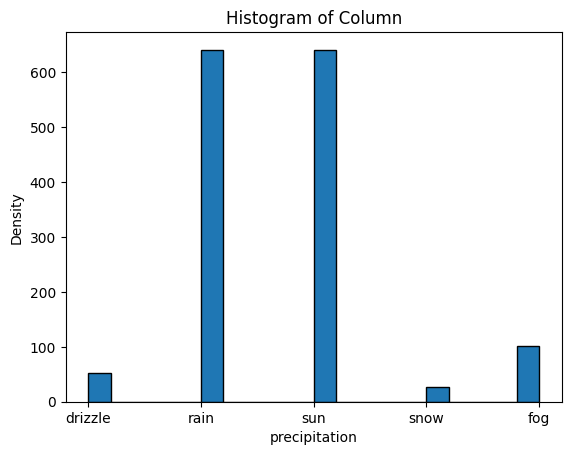

In [56]:
plt.hist(data['weather'], bins=20, edgecolor='black')
plt.xlabel('precipitation') 
plt.ylabel('Density')
plt.title('Histogram of Column') 
plt.show()

Compute summary statistics for the Wind Speed feature and compare them to Humidity.

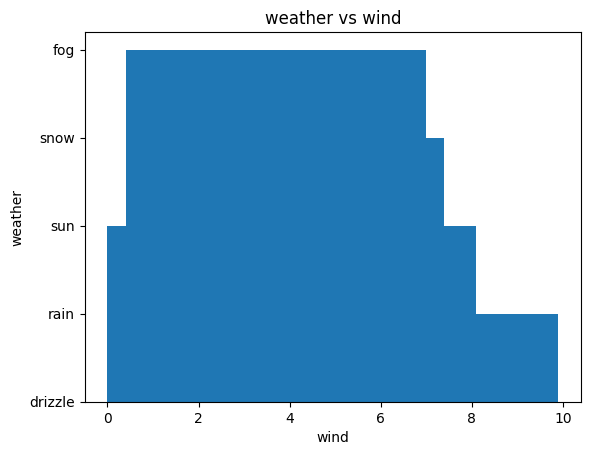

In [57]:
plt.bar(data['wind'],data['weather'])
plt.xlabel('wind')
plt.ylabel('weather')
plt.title('weather vs wind')
plt.show()

What are the monthly averages for Temperature and Precipitation? Create a summary table.

In [58]:
data['date']=pd.to_datetime(data['date'])
data

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [59]:
#extract month from date
data['month']=data['date'].dt.month
data

,date,precipitation,temp_max,temp_min,wind,weather,month
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle,1
1,2012-01-02,10.9,10.6,2.8,4.5,rain,1
2,2012-01-03,0.8,11.7,7.2,2.3,rain,1
3,2012-01-04,20.3,12.2,5.6,4.7,rain,1
4,2012-01-05,1.3,8.9,2.8,6.1,rain,1
...,...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain,12
1457,2015-12-28,1.5,5.0,1.7,1.3,rain,12
1458,2015-12-29,0.0,7.2,0.6,2.6,fog,12
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun,12


What are the monthly averages for Temperature and Precipitation? Create a summary table.

In [60]:
monthly_avg=data.groupby('month').agg({'temp_max':'mean','precipitation':'mean'}).reset_index()
monthly_avg

,month,temp_max,precipitation
0,1,8.229032,3.758065
1,2,9.860177,3.734513
2,3,12.387097,4.888710
3,4,15.020000,3.128333
4,5,19.295968,1.673387
5,6,22.400000,1.107500
6,7,25.998387,0.388710
7,8,26.112097,1.320161
8,9,21.924167,1.962500
9,10,16.389516,4.059677


In [61]:
summary_table=monthly_avg.rename(columns={'month':'Month','temprature':'Avg Temprature','precipitation':'Avg Precipitation'})
summary_table

,Month,temp_max,Avg Precipitation
0,1,8.229032,3.758065
1,2,9.860177,3.734513
2,3,12.387097,4.888710
3,4,15.020000,3.128333
4,5,19.295968,1.673387
5,6,22.400000,1.107500
6,7,25.998387,0.388710
7,8,26.112097,1.320161
8,9,21.924167,1.962500
9,10,16.389516,4.059677


***2.	Visualization Tasks:***

create a histogram for the Temperature feature to visualize its distribution.

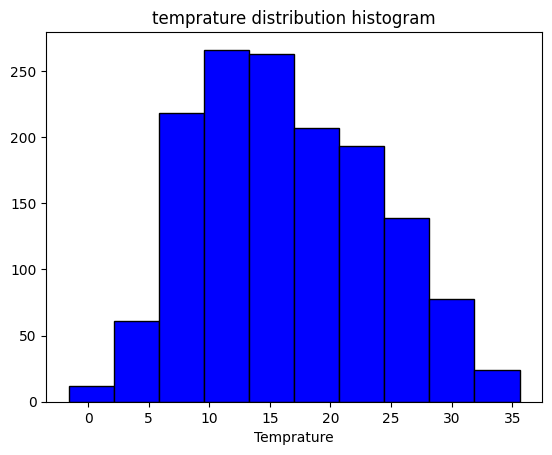

In [62]:
plt.hist(data['temp_max'],bins=10,color='blue',edgecolor='black')
plt.xlabel('Temprature')
plt.title('temprature distribution histogram')
plt.show()

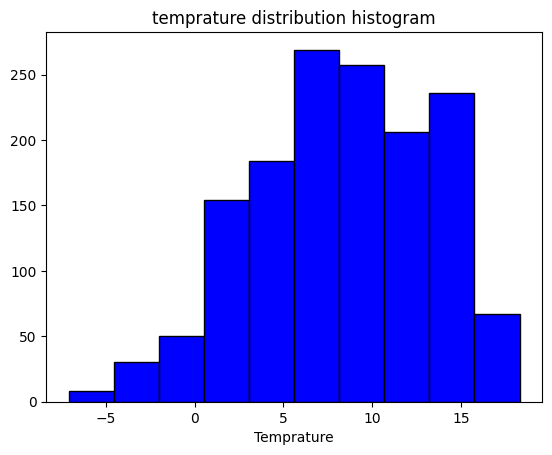

In [63]:
plt.hist(data['temp_min'],bins=10,color='blue',edgecolor='black')
plt.xlabel('Temprature')
plt.title('temprature distribution histogram')
plt.show()

Plot a correlation heatmap showing relationships between Temperature, Precipitation, Wind Speed, and Humidity.

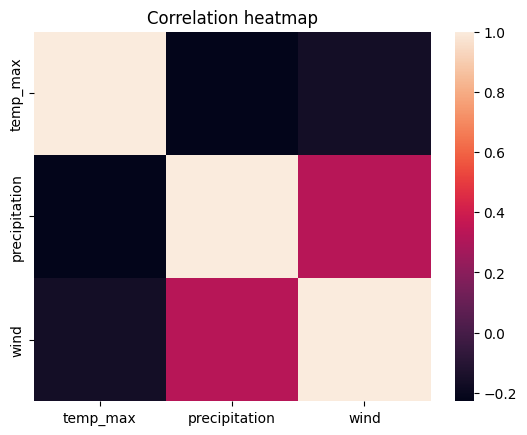

In [64]:
corr= data[['temp_max','precipitation','wind']].corr()
sns.heatmap(corr)
plt.title('Correlation heatmap')
plt.show()

 Generate a time-series plot of Temperature over the last year. What trends do you observe?

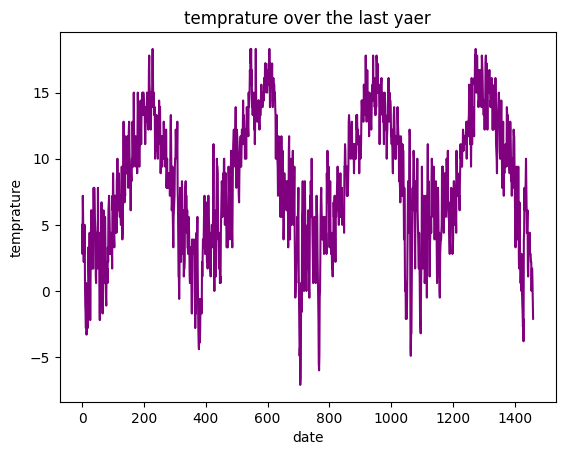

In [65]:
plt.plot(data['temp_min'],color='purple')
plt.title('temprature over the last yaer')
plt.xlabel('date')
plt.ylabel('temprature')
plt.show()

Use a box plot to visualize the distribution and outliers in the Precipitation feature.

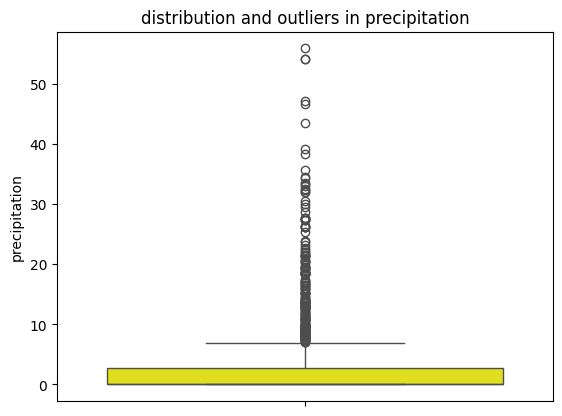

In [66]:
sns.boxplot(data['precipitation'],color='yellow')
plt.title('distribution and outliers in precipitation')
plt.ylabel('precipitation')
plt.show()

***3.conditional Analysis***

 Apply descriptive statistics on min and max Temperature feature in different weather conditions. Use conditional aggregation or visualization techniques.

In [67]:
data= pd.read_csv('seattle-weather.csv')
data

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [69]:
# Group by weather condition and calculate descriptive statistics for temp_max and temp_min
descriptive_stats = data.groupby('weather')[['temp_max', 'temp_min']].describe()
descriptive_stats

temp_max                                                        \
           count       mean       std  min     25%   50%     75%   max   
weather                                                                  
drizzle     53.0  15.926415  8.812036  1.1   8.300  16.1  23.900  31.7   
fog        101.0  16.757426  6.774723  1.7  11.700  16.1  21.700  30.6   
rain       641.0  13.454602  4.973029  3.9  10.000  12.8  16.100  35.6   
snow        26.0   5.573077  3.109155 -1.1   4.025   5.6   8.025  11.1   
sun        640.0  19.861875  7.698258 -1.6  14.400  21.1  25.600  35.0   

        temp_min                                                      
           count      mean       std  min    25%   50%     75%   max  
weather                                                               
drizzle     53.0  7.111321  6.182191 -3.9  1.700   8.3  12.800  16.1  
fog        101.0  7.979208  5.011992 -3.2  3.900   8.3  12.200  17.8  
rain       641.0  7.588768  3.951851 -3.8  4.400   7.2  10.000  18.3  
snow        26.0  0.146154  2.237182 -4.3 -0.975   0.6   0.975   5.6  
sun        640.0  9.343750  5.508277 -7.1  5.600  10.6  13.900  18.3

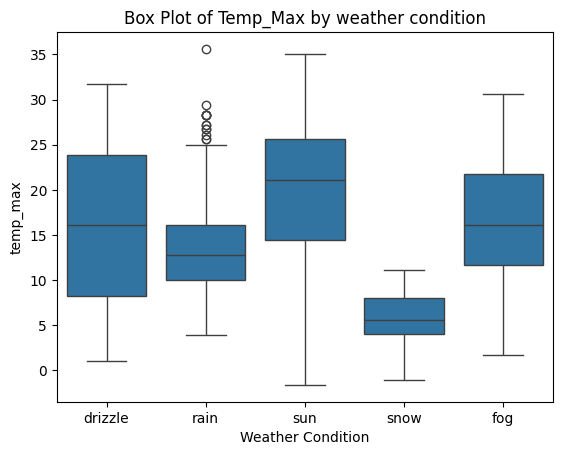

In [70]:
#box plot for temp-max:
sns.boxplot(x='weather', y='temp_max',data=data) 
plt.xlabel('Weather Condition')
plt.ylabel('temp_max')
plt.title('Box Plot of Temp_Max by weather condition')
plt.show()


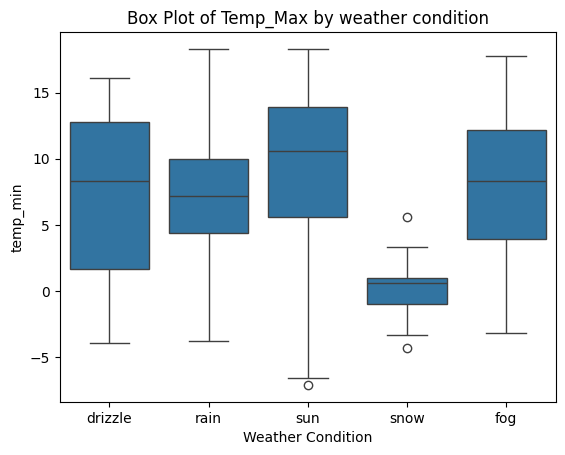

In [71]:
#box plot for temp min
sns.boxplot(x='weather', y='temp_min',data=data) 
plt.xlabel('Weather Condition')
plt.ylabel('temp_min')
plt.title('Box Plot of Temp_Max by weather condition')
plt.show()


Compare Wind Speed on rainy days versus non-rainy days. Use appropriate visualization methods.

In [72]:
data= pd.read_csv('seattle-weather.csv')
data

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [73]:
# Create a new column to indicate rainy days
data['is_rainy'] = data['weather'].apply(lambda x: 'Rain' in x)
data['is_rainy'] 

0       False
1       False
2       False
3       False
4       False
        ...  
1456    False
1457    False
1458    False
1459    False
1460    False
Name: is_rainy, Length: 1461, dtype: bool

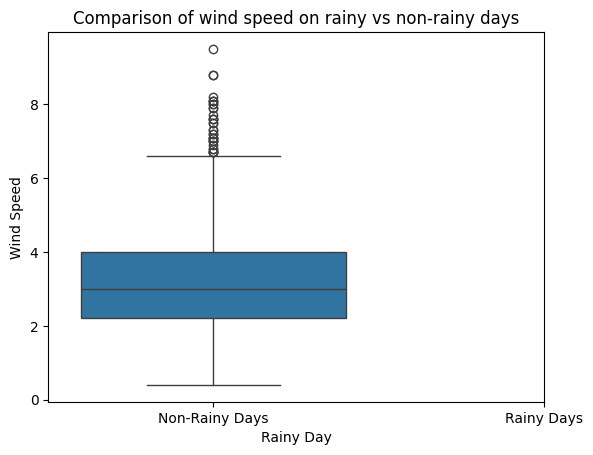

In [74]:
#box plot for wind speed on rainy vs non-rainy days:
sns.boxplot(x='is_rainy', y='wind',data=data) 
plt.xlabel('Rainy Day')
plt.ylabel('Wind Speed')
plt.title('Comparison of wind speed on rainy vs non-rainy days')
plt.xticks([0, 1], ['Non-Rainy Days', 'Rainy Days'])
plt.show()


***4. Advanced Visualizations:***

Create a heatmap to show the intensity of Temperature across different hours of the day.

In [75]:
data= pd.read_csv('seattle-weather.csv')
data

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [76]:
# Convert the date column to datetime
data['date'] = pd.to_datetime(data['date'])
data['date']

0      2012-01-01
1      2012-01-02
2      2012-01-03
3      2012-01-04
4      2012-01-05
          ...    
1456   2015-12-27
1457   2015-12-28
1458   2015-12-29
1459   2015-12-30
1460   2015-12-31
Name: date, Length: 1461, dtype: datetime64[ns]

In [77]:
# Extract the hour from the date column
data['hour'] = data['date'].dt.hour
data['hour']

0       0
1       0
2       0
3       0
4       0
       ..
1456    0
1457    0
1458    0
1459    0
1460    0
Name: hour, Length: 1461, dtype: int32

In [78]:
# Create a pivot table to aggregate the temperature by hour
pivot_table = data.pivot_table(values='temp_max', index='hour', columns='date', aggfunc='mean')
pivot_table

date,2012-01-01,2012-01-02,2012-01-03,2012-01-04,2012-01-05,2012-01-06,2012-01-07,2012-01-08,2012-01-09,2012-01-10,...,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-26,2015-12-27,2015-12-28,2015-12-29,2015-12-30,2015-12-31
hour,,,,,,,,,,,,,,,,,,,,,
0,12.8,10.6,11.7,12.2,8.9,4.4,7.2,10.0,9.4,6.1,...,7.8,5.0,5.6,5.0,4.4,4.4,5.0,7.2,5.6,5.6


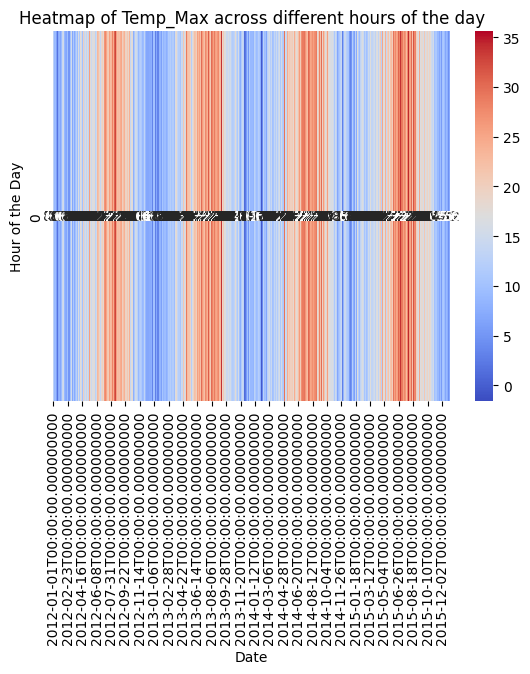

In [79]:
sns.heatmap(pivot_table, annot=True, cmap='coolwarm')
plt.xlabel('Date')
plt.ylabel('Hour of the Day')
plt.title('Heatmap of Temp_Max across different hours of the day')
plt.show()


Use pair plots to explore relationships between Temperature, Precipitation, Wind Speed

In [80]:
data= pd.read_csv('seattle-weather.csv')
data

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [81]:
# Select the features for pair plot
features = ['temp_max', 'temp_min', 'precipitation', 'wind']
features

['temp_max', 'temp_min', 'precipitation', 'wind']

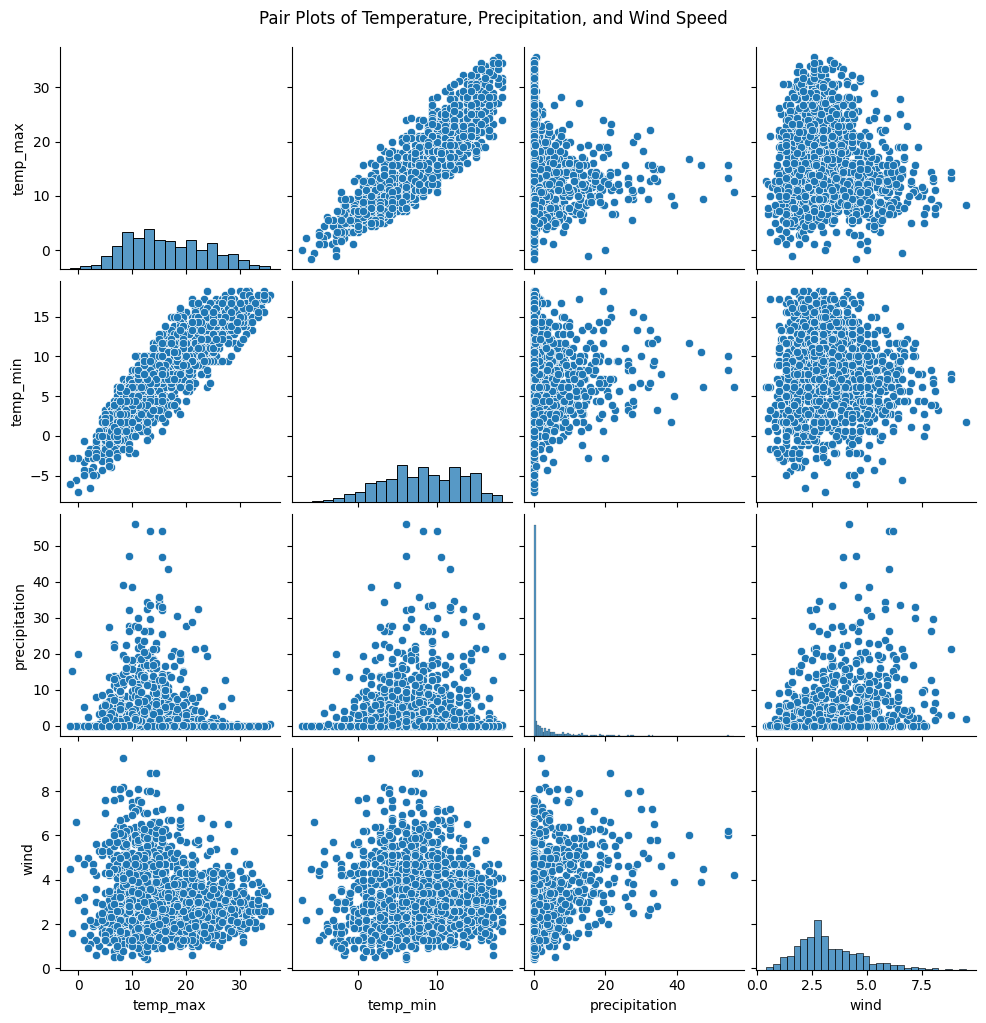

In [82]:
# Create pair plots
sns.pairplot(data[features])
plt.suptitle('Pair Plots of Temperature, Precipitation, and Wind Speed', y=1.02)
plt.show()

***Part 3: Regression Modeling 1. Linear Regression:***

 Fit a simple linear regression model to predict temperature based on wind
 . What is the R-squared value, and how well does the model perform?b

In [83]:
data= pd.read_csv('seattle-weather.csv')
data

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [84]:
# Select the features for the model
wind_speed = data['wind']
temperature = data['temp_max']
X = wind_speed.values.reshape(-1, 1)
y = temperature.values

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

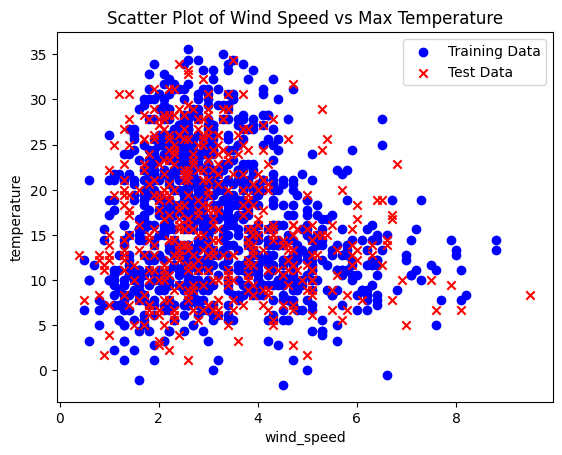

In [86]:
# Scatter plot of training and test data
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.scatter(X_test, y_test, color='red', label='Test Data', marker='x')
plt.xlabel('wind_speed')
plt.ylabel('temperature')
plt.title('Scatter Plot of Wind Speed vs Max Temperature')
plt.legend()
plt.show()

In [87]:
# Calculate the correlation coefficient
corr_coef, _ = pearsonr(wind_speed, temperature)
print('Correlation Coefficient:', corr_coef)

Correlation Coefficient: -0.16485663487495483


In [88]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [89]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [90]:
# Calculate the Mean Squared Error and R-squared value
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
print('Training Mean Squared Error:', mse_train)
print('Test Mean Squared Error:', mse_test)
print('Training R^2 Score:', r2_train)
print('Test R^2 Score:', r2_test)

Training Mean Squared Error: 52.92291222208326
Test Mean Squared Error: 51.58276785425756
Training R^2 Score: 0.025888008215905645
Test R^2 Score: 0.029405016526634742


In [91]:
# Predict the temperature for a new wind speed value
wind_speed_new = np.array([[3.8]])
temperature_pred = model.predict(wind_speed_new)
print('Predicted Max Temperature for Wind Speed 3.8:', temperature_pred[0])

Predicted Max Temperature for Wind Speed 3.8: 16.04661653829097


***2.	Multiple Linear Regression:***

o	Build a multiple linear regression model using temperature, humidity, and precipitation to predict another feature (e.g., weather condition). Assess the model's performance using appropriate metrics.

In [92]:
data= pd.read_csv('seattle-weather.csv')
data

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [93]:
X = data[['temp_max','precipitation']]
y = data['temp_min']

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [95]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [96]:
y_pred = model.predict(X_test)

In [97]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print(f"R^2 Score: {r2}")


Mean Squared Error: 5.544459088433964
R^2 Score: 0.7846595686232414


In [98]:
# Predict the temperature for new values
temp_max = 60
precipitation = 0.1
predicted_temp_min = model.predict([[temp_max,precipitation]])
print(f"Predicted Min Temperature for Temp Max = {temp_max} and Precipitation = {precipitation}: {predicted_temp_min[0]}")

Predicted Min Temperature for Temp Max = 60 and Precipitation = 0.1: 34.67708503498737


C:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


***3.	Polynomial Regression:***

o	Fit a polynomial regression model to capture non-linear relationships between temperature and precipitation. Determine the appropriate degree for the polynomial and evaluate model performance.

In [99]:
data= pd.read_csv('seattle-weather.csv')
data

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [102]:
X = data[['precipitation']].values
y = data['temp_max'].values

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [104]:
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

LinearRegression()

In [105]:
y_pred_linear = linear_regressor.predict(X_test)
r2_linear = r2_score(y_test, y_pred_linear)

In [106]:
poly_features = PolynomialFeatures(degree=2)
X_poly_train = poly_features.fit_transform(X_train)
X_poly_test = poly_features.transform(X_test)

In [109]:
poly_regressor = LinearRegression()
poly_regressor.fit(X_poly_train, y_train)

LinearRegression()

In [110]:
y_pred_poly = poly_regressor.predict(X_poly_test)
r2_poly = r2_score(y_test, y_pred_poly)

In [111]:
print('Linear Regression R^2 score:', r2_linear)
print('Polynomial Regression (degree 2) R^2 score:', r2_poly)

Linear Regression R^2 score: 0.060005673981392116
Polynomial Regression (degree 2) R^2 score: 0.10499949059583835


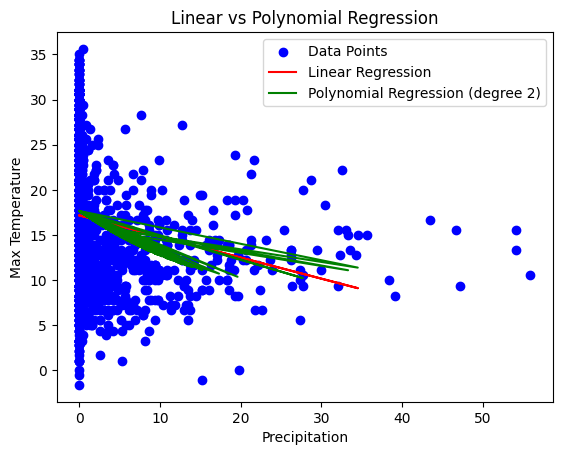

In [112]:
# Plotting the results
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X_test, y_pred_linear, color='red', label='Linear Regression')
plt.plot(X_test, y_pred_poly, color='green', label='Polynomial Regression (degree 2)')
plt.xlabel('Precipitation')
plt.ylabel('Max Temperature')
plt.title('Linear vs Polynomial Regression')
plt.legend()
plt.show()

***4.	Ridge Regression:***

o	Apply ridge regression to predict temperature from multiple features, including wind and precipitation. Experiment with different regularization parameters and discuss their impact on model performance.

In [115]:
data= pd.read_csv('seattle-weather.csv')
data

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [117]:
X = data[['wind', 'precipitation']]
y = data['temp_max']

In [118]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [120]:
ridge_reg = Ridge(alpha=1.0)  
ridge_reg.fit(X_train, y_train)


Ridge()

In [123]:
# Predict the temperature on the test set
y_pred = ridge_reg.predict(X_test)

In [126]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Ridge Regression Results:")
print("Mean Squared Error on Test Set: ", mse)
print(f"R^2 Score on Test Set: ", r2)

Ridge Regression Results:
Mean Squared Error on Test Set:  52.813688268431335
R^2 Score on Test Set:  0.07194532728405145


In [127]:
# Predict the temperature for new values
wind = 3.8
precipitation = 0.1
new_data = scaler.transform([[wind, precipitation]])
predicted_temp_max = ridge_reg.predict(new_data)
print(f"Predicted Max Temperature for Wind = {wind} and Precipitation = {precipitation}: {predicted_temp_max[0]}")

Predicted Max Temperature for Wind = 3.8 and Precipitation = 0.1: 16.74277321296055


C:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


***5.	Lasso Regression:***

o	Implement lasso regression to predict precipitation while performing feature selection. Analyze how varying the regularization parameter affects feature selection and model performance.

In [130]:
data= pd.read_csv('seattle-weather.csv')
data

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [131]:
X = data[['temp_max', 'temp_min', 'wind']]
y = data['precipitation']

In [132]:
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [134]:
lasso_reg = Lasso(alpha=0.1)  
lasso_reg.fit(X_train, y_train)

Lasso(alpha=0.1)

In [135]:
# Predict the precipitation on the test set
y_pred = lasso_reg.predict(X_test)

In [137]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Lasso Regression Results:")
print("Mean Squared Error on Test Set: ", mse)
print("R^2 Score on Test Set: ", r2)

Lasso Regression Results:
Mean Squared Error on Test Set:  31.324514598892435
R^2 Score on Test Set:  0.19316215121238156


In [138]:
# Predict the precipitation for new values
temp_max = 60
temp_min = 50
wind = 3.8
new_data = scaler.transform([[temp_max, temp_min, wind]])
predicted_precipitation = lasso_reg.predict(new_data)
print(f"Predicted Precipitation for Temp Max = {temp_max}, Temp Min = {temp_min} and Wind = {wind}: {predicted_precipitation[0]}")

Predicted Precipitation for Temp Max = 60, Temp Min = 50 and Wind = 3.8: 5.018546504552646


C:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


The alpha parameter controls the strength of the regularization. A higher alpha value increases regularization, which can help prevent overfitting but may also lead to underfitting if too high. It also affects feature selection by shrinking some coefficients to zero, effectively removing those features from the model.By experimenting with different alpha values, we can find a balance between bias and variance, improving the model’s performance on unseen data.